## Initilization

In [111]:
import seaborn as sns

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import pandasql as ps


Loading the data

In [112]:
wc_data = pd.read_csv("Data/Fifa_world_cup_matches.csv")

wc_data.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


# Data analysis / cleaning

In [113]:
# making a smaller, more useful dataframe that will include what we want

wc_small_data = wc_data[["team1", "team2", "possession team1", "possession team2", "possession in contest", "number of goals team1", "number of goals team2"]]

wc_small_data.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2
0,QATAR,ECUADOR,42%,50%,8%,0,2
1,ENGLAND,IRAN,72%,19%,9%,6,2
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2
3,UNITED STATES,WALES,51%,39%,10%,1,1
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2


We change the name of the longer names to make it simpler

In [114]:
wc_small_data.columns = ["team1", "team2", "pos team1", "pos team2", "pos contest", "goals team1", "goals team2"]

wc_small_data.head(5)

,team1,team2,pos team1,pos team2,pos contest,goals team1,goals team2
0,QATAR,ECUADOR,42%,50%,8%,0,2
1,ENGLAND,IRAN,72%,19%,9%,6,2
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2
3,UNITED STATES,WALES,51%,39%,10%,1,1
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2


We will do this simple by splitting our dataframe into 2 spots and aggregate them later to get something useful

In [115]:
#split into two dataframes

team_1 = wc_small_data[['team1','goals team1']]
team_2 = wc_small_data[['team2', 'goals team2']]

agg_1 = team_1.groupby('team1').sum()
agg_2 = team_2.groupby('team2').sum()

agg_1 = agg_1.reset_index()
agg_2 = agg_2.reset_index()


# join the 2 datasets backtogether by the team columns

agg_joined = pd.merge(agg_1, agg_2, left_on = 'team1', right_on = 'team2', how = "inner")

agg_joined

# sum the goal columns into a total column
goals_data = agg_joined.assign(total_goals=agg_joined['goals team1'] + agg_joined['goals team2'])

# select only the columns we need and rename
goals_data = goals_data[['team1', 'total_goals']]

goals_data.columns = ["Teams", "Total goals"]


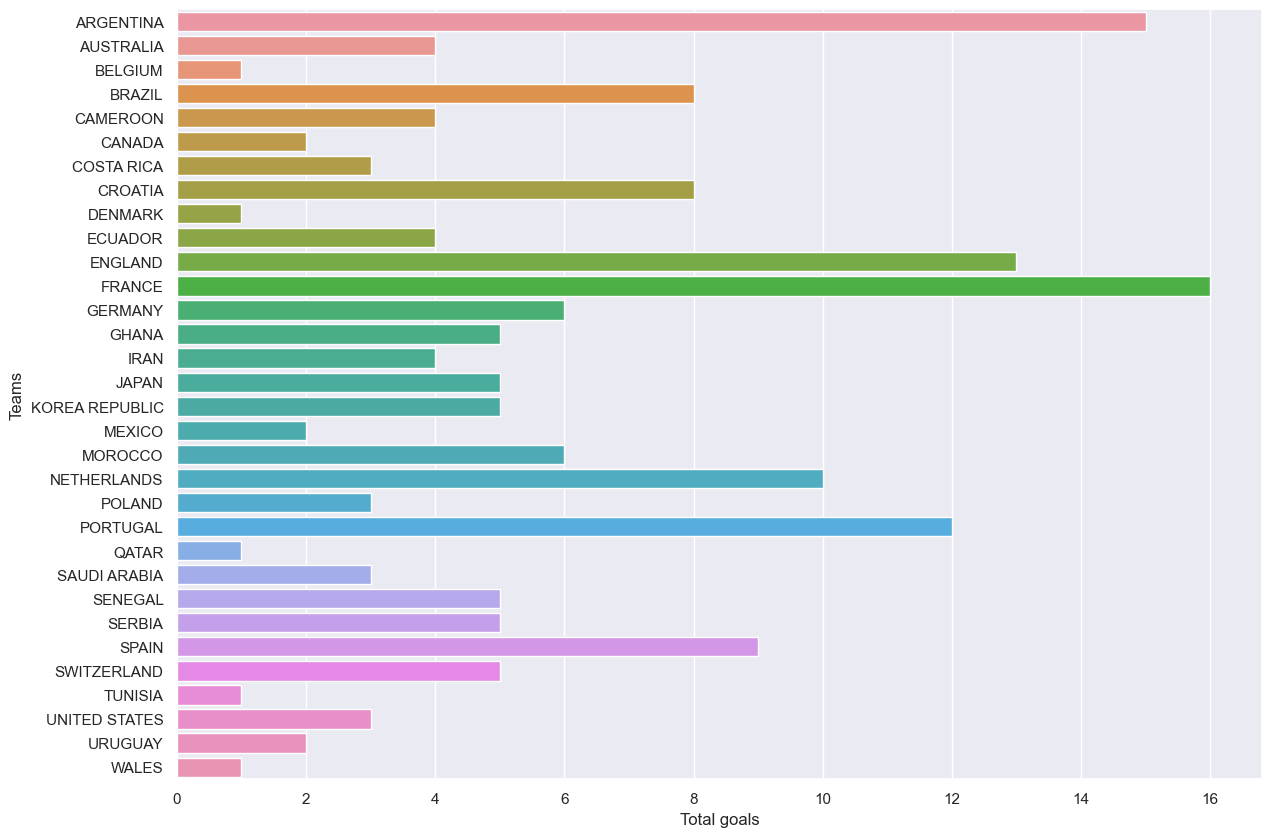

In [116]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=goals_data, x="Total goals", y="Teams"
)
plt.show()